In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

%matplotlib inline
np.set_printoptions(suppress=True)

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [3]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [5]:
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_train.data).todense()
vectors.shape

(2034, 26576)

In [6]:
print(len(newsgroups_train.data), vectors.shape)

2034 (2034, 26576)


In [8]:
vocab = np.array(vectorizer.get_feature_names())

In [9]:
vocab.shape

(26576,)

In [10]:
vocab[7000:7020]

array(['cosmonauts', 'cosmos', 'cosponsored', 'cost', 'costa', 'costar',
       'costing', 'costly', 'costruction', 'costs', 'cosy', 'cote',
       'couched', 'couldn', 'council', 'councils', 'counsel',
       'counselees', 'counselor', 'count'], dtype='<U80')

In [11]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 1min 47s, sys: 26.3 s, total: 2min 13s
Wall time: 18.6 s


In [12]:
print(U.shape, s.shape, Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


In [22]:
product = np.dot(U, U.T)
np.fill_diagonal(product, 0)
np.any(product != 0)

array([-0.,  0., -0., ..., -0.,  0., -0.])

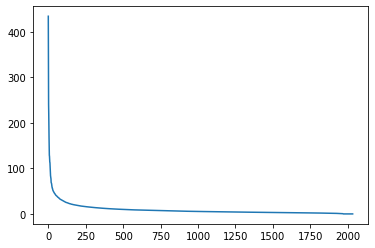

In [24]:
plt.plot(s);

In [25]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [26]:
show_topics(Vh[:10])

['ditto critus propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material']